In [20]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
season_one = "transcripts/season_1"
season_two = "transcripts/season_2"
season_three = "transcripts/season_3"
season_four = "transcripts/season_4"

season_one_contents = ""
for file in os.listdir(season_one):
    with open(season_one + "/" +file, encoding="utf8") as file:
        episode_contents = file.read()
        season_one_contents += episode_contents

season_two_contents = ""
for file in os.listdir(season_two):
    with open(season_two + "/" +file, encoding="utf8") as file:
        episode_contents = file.read()
        season_two_contents += episode_contents

season_three_contents = ""
for file in os.listdir(season_three):
    with open(season_three + "/" +file, encoding="utf8") as file:
        episode_contents = file.read()
        season_three_contents += episode_contents

season_four_contents = ""
for file in os.listdir(season_four):
    with open(season_four + "/" +file, encoding="utf8") as file:
        episode_contents = file.read()
        season_four_contents += episode_contents

full_transcript = season_one_contents + season_two_contents + season_three_contents + season_four_contents


The length of words_split_on_whitespace is 651461.

In [17]:
full_lower = full_transcript.lower()

words_split_on_whitespace = full_lower.split()
len(words_split_on_whitespace)



651461

In [18]:
#rename for ease of coding
s1 = season_one_contents
s2 = season_two_contents
s3 = season_three_contents
s4 = season_four_contents

s1_l = s1.lower()
s2_l = s2.lower()
s3_l = s3.lower()
s4_l = s4.lower()

The length of vector_book is 418816 (for part 1a of the assignment). The test_string is the contents of the book with spaces around punctuation but without being turned into a list.

In [21]:
punc_list = ["!","&",".","?",",","-","——","(",")","~","—"]

def pad_punctuation(text):
  test_string = text
  for punc in punc_list:
    test_string = re.sub(re.escape(punc)," "+punc+" ",test_string)
  return test_string.split()

vector_full = pad_punctuation(full_transcript)

In [ ]:
ppv1 = pad_punctuation(ppv1)
ppv2 = pad_punctuation(ppv2)
ppv3 = pad_punctuation(ppv3)
#ch17 = pad_punctuation(ch17)

In [ ]:
from collections import Counter
counted = Counter(vector_book)

In [ ]:
import json
with open("counted.json", 'w') as f:
    json.dump(counted, f, indent=4, sort_keys=True, ensure_ascii=False)

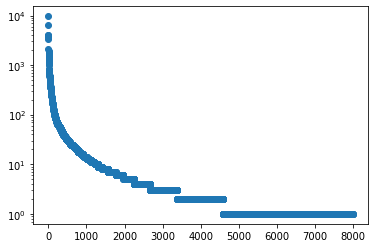

In [ ]:
sorted_char_names = list(counted.values())
sorted_char_names.sort(reverse=True)
fig = plt.figure()
ax = plt.gca()
ax.scatter(x=range(len(counted.values())),y=sorted_char_names)
ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(sorted_char_names)
plt.show()

In [ ]:

counted_ppv1 = Counter(ppv1)
counted_ppv2 = Counter(ppv2)
counted_ppv3 = Counter(ppv3)
#counted_ch17 = Counter(ch17)

v1v2 = Counter(ppv1+ppv2)
v2v3 = Counter(ppv2+ppv3)
v1v3 = Counter(ppv1+ppv3)

In [ ]:
prefixes = ["mr.", "mrs.", "ms.", "dr.", "mme.", "rev.", "lt.", "col.",
            "hon.", "st."]

def pad_prefixes(some_text, prefix_list):
    for prefix in prefixes:
        some_text = re.sub(re.escape(prefix),prefix[:-1],some_text)
    return some_text

text = book
text = pad_prefixes(text, prefixes)
#documents = text.split(r'.')
documents = re.split(r'(\.|\!|\?)', text)

In [ ]:
chapters = re.split(r'chapter', text)

In [ ]:
len(chapters)

62

In [ ]:
counted

### PDS 
We'll need something to use as a happiness score. I think I can use valence, or maybe goodness, from Dodds' word list.

In [ ]:
word_df = pd.read_csv("http://pdodds.w3.uvm.edu/permanent-share/ousiometry_data.txt", sep="\t")

In [ ]:
with open('zipf_case_sens.txt', 'a') as the_file:
    for word in word_df["word"]:
      if word in set(counted.keys()):
        the_file.write(str(counted[word])+"\n")
        #the_file.write(str(1)+"\n")
      else:
        the_file.write(str(0)+"\n")

In [ ]:
shared_words_pds = list(set(list(word_df["word"])).intersection(set(vector_book)))

backwards_word_dict_pds = word_df["word"].to_dict()
word_dict = {y:x for x,y in backwards_word_dict_pds.items()}

valence_score_dict = {x: word_df["valence"][word_dict[x]] for x in shared_words_pds}
goodness_score_dict = {x: word_df["goodness"][word_dict[x]] for x in shared_words_pds}
energy_score_dict = {x: word_df["energy"][word_dict[x]] for x in shared_words_pds}
power_score_dict = {x: word_df["power"][word_dict[x]] for x in shared_words_pds}
danger_score_dict = {x: word_df["danger"][word_dict[x]] for x in shared_words_pds}
structure_score_dict = {x: word_df["structure"][word_dict[x]] for x in shared_words_pds}

In [ ]:
shared_words_pds = list(set(list(word_df["word"])).intersection(set(vector_book)))

In [ ]:
len(shared_words_pds)/len(list(word_df["word"]))

0.18139558132560232

### Happiness via labMT
I found a link to the labMT dataset online, then saved that file locally as labmt.txt so I could delete the headers.

In [ ]:
labmt_word_df = pd.read_csv("labmt.txt",sep="\t")

In [ ]:
shared_words = list(set(list(labmt_word_df["word"])).intersection(set(vector_book)))

backwards_word_dict = labmt_word_df["word"].to_dict()
word_dict = {y:x for x,y in backwards_word_dict.items()}

happiness_score_dict = {x: labmt_word_df["happiness_average"][word_dict[x]] for x in shared_words}

In [ ]:
len(shared_words)

3222

### Happiness Time Series

Now to make happiness time series with various size text windows.

In [ ]:
#vector_book

def step_window(sample_text, dicti):
  #T_list = [10**1, 10**1.5, 10**2, 10**2.5, 10**3, 10**3.5, 10**4]
  T_list = [2*10**3]
  d_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
  all_window_happiness = []

  x_values_list = []

  d = d_list[1]
  for T in T_list:
    T = round(T)
    start_window = 0
    stop_window = start_window + T

    #emergency_quit = 0
    window_happinesses = []
    x_values = []

    while start_window < len(sample_text): #or emergency_quit > 10*3:
      window = sample_text[start_window:stop_window]
      #print(window)

      happiness_scores = [dicti[w] for w in window if w in dicti.keys()]
      happiness_scores = [x for x in happiness_scores if abs(x - 5.0) > d]
      #print(happiness_scores)
      if len(happiness_scores) > 0:
        avg_happiness = sum(happiness_scores)/len(happiness_scores)
      else:
        # sometimes there are no words to score in the window, so for now just use the theoretical average
        pass
      window_happinesses.append(avg_happiness)
      if stop_window < len(sample_text):
        x_values.append(stop_window)
      else:
        x_values.append(len(sample_text))

      start_window += 1
      stop_window = start_window + T
      mid_point = round((stop_window + start_window)/2.0)
      #emergency_quit += 1
    if stop_window < len(sample_text):
      window = sample_text[stop_window:]
      last_happiness = [dicti[w] for w in window if w in dicti.keys()]
      if len(happiness_scores) > 0:
        avg_happiness = sum(happiness_scores)/len(happiness_scores)
      else:
        # sometimes there are no words to score in the window, so for now just use the theoretical average
        pass
      window_happinesses.append(avg_happiness)
      x_values.append(mid_point)

    all_window_happiness.append(window_happinesses)
    x_values_list.append(x_values)
    x_values_list = x_values_list[0][:-1]
    all_window_happiness = all_window_happiness[0][:-1]
    return x_values_list, all_window_happiness

In [ ]:
x_values_list_energy, all_window_energy = step_window(vector_book, energy_score_dict)
x_values_list_goodness, all_window_goodness = step_window(vector_book, goodness_score_dict)
x_values_list_power, all_window_power = step_window(vector_book, power_score_dict)
x_values_list_danger, all_window_danger = step_window(vector_book, danger_score_dict)
x_values_list_structure, all_window_structure = step_window(vector_book, structure_score_dict)

In [ ]:
x_values_list_energy = [x_values_list_energy[0][:-10]]
all_window_energy = [all_window_energy[0][:-10]]
x_values_list_goodness = [x_values_list_goodness[0][:-10]]
all_window_goodness = [all_window_goodness[0][:-10]]
x_values_list_power = [x_values_list_power[0][:-10]]
all_window_power = [all_window_power[0][:-10]]
x_values_list_danger = [x_values_list_danger[0][:-10]]
all_window_danger = [all_window_danger[0][:-10]]
x_values_list_structure = [x_values_list_structure[0][:-10]]
all_window_structure = [all_window_structure[0][:-10]]

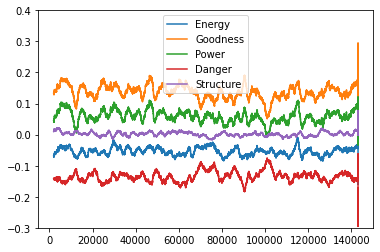

In [ ]:

ax = plt.gca()
for i in range(len(all_window_energy)):
  line1, = ax.plot(x_values_list_energy[i],all_window_energy[i], label="Energy")
  line2, = ax.plot(x_values_list_goodness[i],all_window_goodness[i], label="Goodness")
  line3, = ax.plot(x_values_list_power[i],all_window_power[i], label="Power")
  line4, = ax.plot(x_values_list_danger[i],all_window_danger[i], label="Danger")
  line5, = ax.plot(x_values_list_structure[i],all_window_structure[i], label="Structure")
ax.set_ylim([-0.3, 0.4])
ax.legend(handles=[line1, line2, line3, line4, line5])
plt.show()

In [ ]:
len(x_values_list_energy[0])

143049

### Word shifts

In [ ]:
# Install shifterator
!pip install shifterator

     |████████████████████████████████| 40.4 MB 1.3 MB/s 


In [ ]:
import shifterator as sh

According to the docs, we need two dictionaries of 1-grams : frequency

In [ ]:
midpoint = int(len(vector_book)/2)
vol1_dict = Counter(vector_book[:midpoint])
vol2_dict = Counter(vector_book[midpoint:])


In [ ]:
counted == counted_ch17

True

In [ ]:
proportion_shift = sh.ProportionShift(type2freq_1=counted,
                                      type2freq_2=counted_ch17)
proportion_shift.get_shift_graph(system_names = ['Whole Book', 'Vol. 2 Ch. 17'],
                                 title='Proportion Shift')

In [ ]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1=counted,
                                      type2freq_2=counted_ch17,
                                      type2score_1='labMT_English',
                                      reference_value=5.98,
                                      stop_lens=[(4,6)])

sentiment_shift.get_shift_graph(detailed=True,
                                system_names=['Whole book', 'Vol. 2 Ch. 17'])